In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

In [2]:
#DATADIR = '../rundirs/geosfp_4x5_standard/KPP_fields/'
DATADIR = '../rundirs/geosfp_4x5_HetChemOff/'
DATADIR = './'

CODEDIR = '../Code.12.0.0/'

In [3]:
ds = xr.open_dataset(DATADIR+'KPP_fields_100.nc')
ds

<xarray.Dataset>
Dimensions:   (lat: 46, lev: 72, lon: 72, nphotol: 130, nphy: 4, nreact: 725, nspec: 240)
Dimensions without coordinates: lat, lev, lon, nphotol, nphy, nreact, nspec
Data variables:
    C_before  (lev, lat, lon, nspec) float64 ...
    C_after   (lev, lat, lon, nspec) float64 ...
    PHOTOL    (lev, lat, lon, nphotol) float64 ...
    PHY       (lev, lat, lon, nphy) float64 ...
    RCONST    (lev, lat, lon, nreact) float64 ...

In [4]:
ds.nbytes/1e9

2.554426368

# Add meaningful lables to raw output data

In [5]:
def read_varnames(codefile):
    with open (codefile, "r") as f:
        code_str = f.readlines()

    varnames = []

    pattern = 'INTEGER, PARAMETER :: ind_'
    for line in code_str:
        if pattern in line:
            varnames.append( line.replace(pattern,'').split()[0] )

    return varnames

In [9]:
import metadata_util
spec_names = metadata_util.read_spec_names()
print(len(spec_names), spec_names)

240 ['CH2I2', 'CH2ICl', 'CH2IBr', 'AERI', 'CO2', 'INDIOL', 'ISALA', 'ISALC', 'ISN1OA', 'ISN1OG', 'LBRO2H', 'LBRO2N', 'LISOPOH', 'LISOPNO3', 'LTRO2H', 'LTRO2N', 'LVOCOA', 'LVOC', 'LXRO2H', 'LXRO2N', 'MSA', 'PYAC', 'SO4H1', 'SO4H2', 'SOAGX', 'SOAIE', 'SOAME', 'IMAE', 'SOAMG', 'POx', 'LOx', 'PCO', 'LCO', 'PSO4', 'LCH4', 'PH2O2', 'I2O4', 'DHDN', 'DHDC', 'I2O2', 'MONITA', 'BENZ', 'CH3CCl3', 'CH3I', 'H1301', 'H2402', 'I2O3', 'PMNN', 'PPN', 'TOLU', 'BrNO2', 'CCl4', 'CFC11', 'CFC12', 'CFC113', 'CFC114', 'CFC115', 'H1211', 'IBr', 'IEPOXD', 'INO', 'N2O', 'TRO2', 'BRO2', 'IEPOXA', 'IEPOXB', 'IONITA', 'N', 'OCS', 'XRO2', 'HI', 'MAP', 'CHBr3', 'ICl', 'CH2Cl2', 'IMAO3', 'CHCl3', 'MPN', 'Cl2O2', 'CH2Br2', 'ETP', 'HCFC123', 'ClNO2', 'HCFC141b', 'HCFC142b', 'IONO', 'HCFC22', 'OIO', 'RA3P', 'RB3P', 'XYLE', 'DMS', 'CH3Cl', 'CH3Br', 'HNO4', 'ClOO', 'HNO2', 'OClO', 'PAN', 'RP', 'PP', 'PRPN', 'SO4', 'ALK4', 'PIP', 'R4P', 'HPALD', 'BrCl', 'C3H8', 'DHPCARP', 'HOI', 'IAP', 'HPC52O2', 'VRP', 'ATOOH', 'Br2', 'HC

In [10]:
ds.coords['nspec'] = xr.DataArray(spec_names, dims='nspec')
ds

<xarray.Dataset>
Dimensions:   (lat: 46, lev: 72, lon: 72, nphotol: 130, nphy: 4, nreact: 725, nspec: 240)
Coordinates:
  * nspec     (nspec) <U8 'CH2I2' 'CH2ICl' 'CH2IBr' 'AERI' 'CO2' 'INDIOL' ...
Dimensions without coordinates: lat, lev, lon, nphotol, nphy, nreact
Data variables:
    C_before  (lev, lat, lon, nspec) float64 ...
    C_after   (lev, lat, lon, nspec) float64 ...
    PHOTOL    (lev, lat, lon, nphotol) float64 ...
    PHY       (lev, lat, lon, nphy) float64 ...
    RCONST    (lev, lat, lon, nreact) float64 ...

## Sanity check

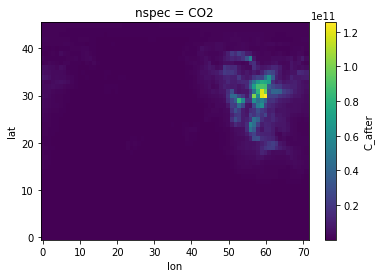

In [11]:
ds['C_after'].sel(nspec='CO2')[0].plot()

In [12]:
ds.coords['nphy'] = xr.DataArray(['TEMP', 'PRESS', 'NUMDEN', 'H2O'], dims='nphy')
ds

<xarray.Dataset>
Dimensions:   (lat: 46, lev: 72, lon: 72, nphotol: 130, nphy: 4, nreact: 725, nspec: 240)
Coordinates:
  * nspec     (nspec) <U8 'CH2I2' 'CH2ICl' 'CH2IBr' 'AERI' 'CO2' 'INDIOL' ...
  * nphy      (nphy) <U6 'TEMP' 'PRESS' 'NUMDEN' 'H2O'
Dimensions without coordinates: lat, lev, lon, nphotol, nreact
Data variables:
    C_before  (lev, lat, lon, nspec) float64 ...
    C_after   (lev, lat, lon, nspec) float64 ...
    PHOTOL    (lev, lat, lon, nphotol) float64 ...
    PHY       (lev, lat, lon, nphy) float64 ...
    RCONST    (lev, lat, lon, nreact) float64 ...

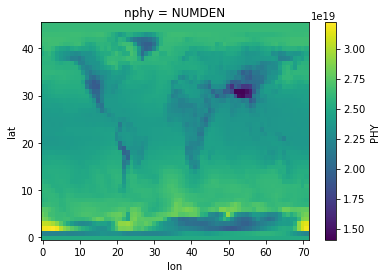

In [13]:
ds['PHY'].sel(nphy='NUMDEN')[0].plot()

# Before and after

In [14]:
ds['C_after'].sel(nspec='CO2')

<xarray.DataArray 'C_after' (lev: 72, lat: 46, lon: 72)>
[238464 values with dtype=float64]
Coordinates:
    nspec    <U8 'CO2'
Dimensions without coordinates: lev, lat, lon

## Remove unnecessary variables

In [15]:
dummy_spec = ['LBRO2H', 'LBRO2N', 'LISOPOH', 'LISOPNO3', 'LTRO2H', 'LTRO2N', 'LXRO2H', 'LXRO2N']

# CO2 is 0 in C_before
# H20 is already defined in PHY
fixed_spec = ['CO2', 'H2O', 'H2', 'MOH', 'N2', 'O2', 'RCOOH']

family_spec = ['POx', 'LOx', 'PCO', 'LCO', 'PSO4', 'LCH4', 'PH2O2']

spec_to_remove = dummy_spec + fixed_spec + family_spec

In [16]:
useful_spec = [v for v in spec_names if v not in spec_to_remove]
print(len(useful_spec), useful_spec)

218 ['CH2I2', 'CH2ICl', 'CH2IBr', 'AERI', 'INDIOL', 'ISALA', 'ISALC', 'ISN1OA', 'ISN1OG', 'LVOCOA', 'LVOC', 'MSA', 'PYAC', 'SO4H1', 'SO4H2', 'SOAGX', 'SOAIE', 'SOAME', 'IMAE', 'SOAMG', 'I2O4', 'DHDN', 'DHDC', 'I2O2', 'MONITA', 'BENZ', 'CH3CCl3', 'CH3I', 'H1301', 'H2402', 'I2O3', 'PMNN', 'PPN', 'TOLU', 'BrNO2', 'CCl4', 'CFC11', 'CFC12', 'CFC113', 'CFC114', 'CFC115', 'H1211', 'IBr', 'IEPOXD', 'INO', 'N2O', 'TRO2', 'BRO2', 'IEPOXA', 'IEPOXB', 'IONITA', 'N', 'OCS', 'XRO2', 'HI', 'MAP', 'CHBr3', 'ICl', 'CH2Cl2', 'IMAO3', 'CHCl3', 'MPN', 'Cl2O2', 'CH2Br2', 'ETP', 'HCFC123', 'ClNO2', 'HCFC141b', 'HCFC142b', 'IONO', 'HCFC22', 'OIO', 'RA3P', 'RB3P', 'XYLE', 'DMS', 'CH3Cl', 'CH3Br', 'HNO4', 'ClOO', 'HNO2', 'OClO', 'PAN', 'RP', 'PP', 'PRPN', 'SO4', 'ALK4', 'PIP', 'R4P', 'HPALD', 'BrCl', 'C3H8', 'DHPCARP', 'HOI', 'IAP', 'HPC52O2', 'VRP', 'ATOOH', 'Br2', 'HC187', 'MOBA', 'HONIT', 'DHMOB', 'RIPB', 'BrSALC', 'ISNP', 'MP', 'BrSALA', 'MAOP', 'MRP', 'RIPA', 'RIPD', 'EOH', 'ETHLN', 'N2O5', 'INPN', 'MTPA'

In [17]:
ds['C_before'].sel(nspec=useful_spec)

<xarray.DataArray 'C_before' (lev: 72, lat: 46, lon: 72, nspec: 218)>
[51985152 values with dtype=float64]
Coordinates:
  * nspec    (nspec) <U8 'CH2I2' 'CH2ICl' 'CH2IBr' 'AERI' 'INDIOL' 'ISALA' ...
Dimensions without coordinates: lev, lat, lon

# Baseline fitting

## Pre-processing

In [20]:
import sklearn
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [21]:
ds_sub = ds.isel(lev=slice(0,20))
n_samples = 20*46*72
n_samples

66240

In [22]:
%%time
X_spec = ds_sub['C_before'].sel(nspec=useful_spec).values.reshape(n_samples, -1)
X_phy = ds_sub['PHY'].values.reshape(n_samples, -1)
X_jv = ds_sub['PHOTOL'].values.reshape(n_samples, -1)

Y_spec = ds_sub['C_after'].sel(nspec=useful_spec).values.reshape(n_samples, -1)

Y_spec.shape

CPU times: user 3.16 s, sys: 11.2 s, total: 14.3 s
Wall time: 14.4 s


In [23]:
scaler_spec = StandardScaler().fit(X_spec)
scaler_phy = StandardScaler().fit(X_phy)
scaler_jv = StandardScaler().fit(X_jv)

In [24]:
X = np.c_[scaler_spec.transform(X_spec), 
          scaler_phy.transform(X_phy), 
          scaler_jv.transform(X_jv)]
X.shape

(66240, 352)

In [25]:
Y = scaler_spec.transform(Y_spec)

In [26]:
Y.std(axis=0)[0:40]

array([0.88462568, 0.95137488, 0.91252225, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.02131887, 1.        ,
       1.03436825, 1.00922056, 1.00020884, 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.02674442, 1.        ,
       1.15549228, 1.03857645, 1.00030066, 1.03029091, 0.36183277,
       0.99343336, 1.00007149, 0.98205231, 1.00000001, 1.00000318,
       1.18476099, 1.03894978, 1.0388514 , 0.8958079 , 0.98374618,
       1.00000002, 1.00000001, 1.00000001, 1.00000001, 1.00000001])

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((52992, 352), (52992, 218), (13248, 352), (13248, 218))

# Check distribution

In [29]:
def plot_dist(var):
    var_idx = useful_spec.index(var)
    fig, axes = plt.subplots(2, 2, figsize=[12, 8])
    axes[0,0].hist(X_train[:,var_idx]); axes[0,0].set_title('before reaction')
    axes[0,1].hist(Y_train[:,var_idx]); axes[0,1].set_title('after reaction')
    axes[1,0].scatter(X_train[:,var_idx], Y_train[:,var_idx], alpha=0.2)
    axes[1,1].scatter(X_train[:,var_idx], Y_train[:,var_idx]-X_train[:,var_idx], alpha=0.2)

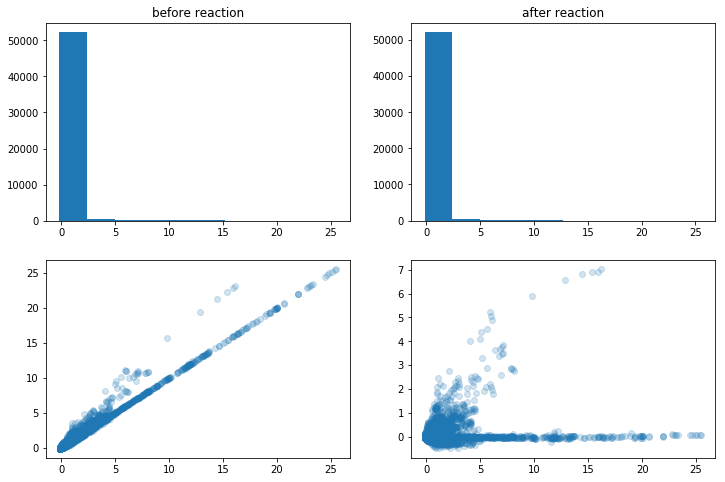

In [30]:
plot_dist('RIPA')

# Start fitting

In [31]:
model = Sequential([
    Dense(400, input_shape=(X.shape[1],)),
    Activation('relu'),
    Dense(200),
    Activation('relu'),
    Dense(Y.shape[1])
])

model.compile(optimizer='adam', loss='mse')

In [32]:
model.fit(X_train, Y_train, epochs=20, batch_size=128)

Epoch 1/20
52992/52992 [==============================] - 2s 41us/step - loss: 0.3440
Epoch 2/20
52992/52992 [==============================] - 2s 41us/step - loss: 0.1222
Epoch 3/20
52992/52992 [==============================] - 2s 45us/step - loss: 0.2631
Epoch 4/20
52992/52992 [==============================] - 2s 44us/step - loss: 0.2431
Epoch 5/20
52992/52992 [==============================] - 2s 45us/step - loss: 0.0933
Epoch 6/20
52992/52992 [==============================] - 2s 39us/step - loss: 0.1420
Epoch 7/20
52992/52992 [==============================] - 2s 40us/step - loss: 0.0705
Epoch 8/20
52992/52992 [==============================] - 2s 42us/step - loss: 0.1031
Epoch 9/20
52992/52992 [==============================] - 2s 43us/step - loss: 0.0665
Epoch 10/20
52992/52992 [==============================] - 2s 44us/step - loss: 0.0561
Epoch 11/20
52992/52992 [==============================] - 2s 43us/step - loss: 0.0549
Epoch 12/20
52992/52992 [===========================

In [33]:
%time Y_pred_train = model.predict(X_train)
%time Y_pred_test = model.predict(X_test)

CPU times: user 2.15 s, sys: 251 ms, total: 2.4 s
Wall time: 1.15 s
CPU times: user 523 ms, sys: 61.2 ms, total: 584 ms
Wall time: 297 ms


In [34]:
r2_score(Y_pred_train, Y_train), r2_score(Y_pred_test, Y_test)

(0.9562498742506937, 0.9488840118361318)

In [35]:
r2_score(Y_pred_test, Y_test, multioutput='raw_values')

array([ 0.88212026,  0.97010416,  0.97127792,  0.96342343,  0.97535396,
        0.9619264 ,  0.96224001,  0.97852217,  0.97346738,  0.96790811,
        0.98438896,  0.95815341,  0.93772896, -0.00984048, -0.01791966,
        0.9720368 ,  0.96804959,  0.96392785,  0.9757384 ,  0.96903832,
        0.96402597,  0.96977256,  0.96317386,  0.74140114,  0.96014008,
        0.97593207,  0.97168773,  0.96260107,  0.97997682,  0.9720716 ,
        0.96596269,  0.96756949,  0.95125426,  0.97406854,  0.95226164,
        0.97432852,  0.97673379,  0.9819107 ,  0.96969444,  0.99016496,
        0.98001353,  0.9812333 ,  0.9848024 ,  0.98653116,  0.8973698 ,
        0.98070696,  0.94296584,  0.95596942,  0.98608085,  0.98892463,
        0.94938637,  0.94125769,  0.98930183,  0.9345086 ,  0.96869118,
        0.97417647,  0.95358305,  0.99138023,  0.9739255 ,  0.96989435,
        0.98053398,  0.94555949,  0.94024406,  0.96355216,  0.97210391,
        0.97329213,  0.98980976,  0.97787191,  0.97962922,  0.72

(-5, 30)

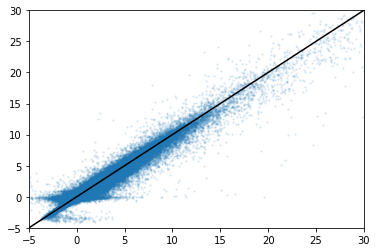

In [46]:
plt.scatter(Y_pred_test, Y_test, alpha=0.1, s=2)

plot_range = [-5, 30]
plt.plot(plot_range, plot_range, c='k')
plt.xlim(*plot_range)
plt.ylim(*plot_range)

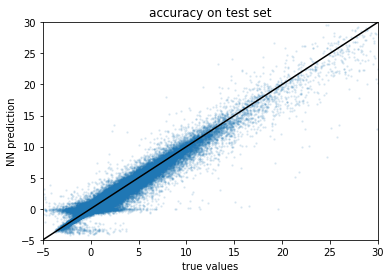

In [52]:
plt.scatter(Y_pred_test, Y_test, alpha=0.1, s=2)

plot_range = [-5, 30]
plt.plot(plot_range, plot_range, c='k')
plt.xlim(*plot_range)
plt.ylim(*plot_range)
plt.xlabel('true values')
plt.ylabel('NN prediction')
plt.title('accuracy on test set')
plt.savefig('baseline_fitting_scatter.png', dpi=200)

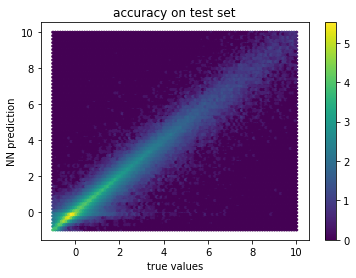

In [53]:
plt.hexbin(Y_pred_test.ravel(), Y_test.ravel(), extent=(-1, 10, -1, 10), bins='log')
plt.xlabel('true values')
plt.ylabel('NN prediction')
plt.title('accuracy on test set')
plt.colorbar()
plt.savefig('baseline_fitting_hexbin.png', dpi=200)

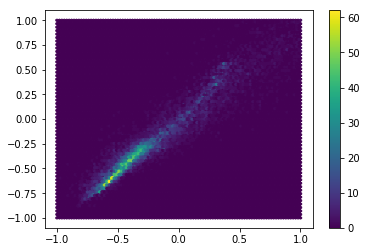

In [51]:
var = 'CO'
var_idx = useful_spec.index(var)

plt.hexbin(Y_pred_test[:,var_idx], Y_test[:,var_idx], extent=(-1, 1, -1, 1))
plt.colorbar()